In [1]:
from basic_indicators import *
import statistics as stats
import numpy as np
import math
import pandas as pd 
from pandas_datareader import data
import matplotlib.pyplot as plt

In [2]:
symbol = 'TATAMOTORS.NS'        #use yahoo symbols
start_date = '2018-12-01'    #start dates for historical data
end_date = '2021-04-17'
SRC_DATA_FILENAME='TATAMOTORS_data'+'|'+start_date+'|'+end_date+'.pkl'

In [3]:
try:
    stock_data = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
    stock_data = data.DataReader(symbol, 'yahoo', start_date,end_date)
    stock_data.to_pickle(SRC_DATA_FILENAME)

In [4]:
sma = SMA(stock_data['Adj Close'])
ema = EMA(stock_data['Adj Close'])
apo = APO(stock_data['Adj Close'])
macd = MACD(stock_data['Adj Close'])
bb = bBand(stock_data['Adj Close'])
rsi = RSI(stock_data['Adj Close'])

In [5]:
stock_data = stock_data.assign(SMA=pd.Series(sma,index=stock_data.index))
stock_data = stock_data.assign(EMA=pd.Series(ema,index=stock_data.index))

In [8]:
stock_data = stock_data.assign(bbu=pd.Series(bb[0],index=stock_data.index))
stock_data = stock_data.assign(bbl=pd.Series(bb[2],index=stock_data.index))
stock_data = stock_data.assign(bbm=pd.Series(bb[1],index=stock_data.index))

In [11]:
stock_data = stock_data.assign(macd=pd.Series(macd[0],index=stock_data.index))
stock_data = stock_data.assign(macd_signal=pd.Series(macd[1],index=stock_data.index))
stock_data = stock_data.assign(macd_hist=pd.Series(macd[2],index=stock_data.index))

# SMA and EMA

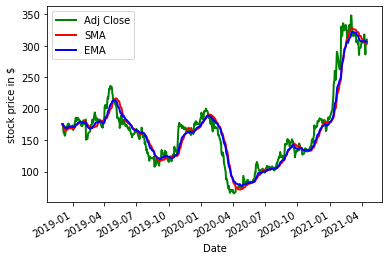

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='stock price in $')
stock_data['Adj Close'].plot(ax=ax1, color='g', lw=2., legend=True)
stock_data['SMA'].plot(ax=ax1, color='r', lw=2., legend=True)
stock_data['EMA'].plot(ax=ax1, color='b', lw=2, legend=True)
plt.show()

# Bollinger Band

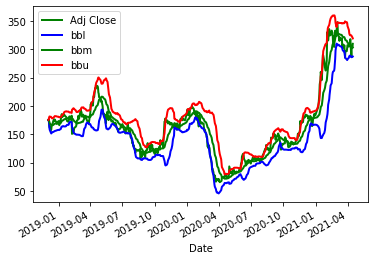

In [13]:
fig = plt.figure()
stock_data['Adj Close'].plot(color='g', lw=2., legend=True)
stock_data['bbl'].plot(color='b', lw=2., legend=True)
stock_data['bbm'].plot(color='g', lw=2., legend=True)
stock_data['bbu'].plot(color='r', lw=2., legend=True)
plt.show()

# MACD

<IPython.core.display.Javascript object>


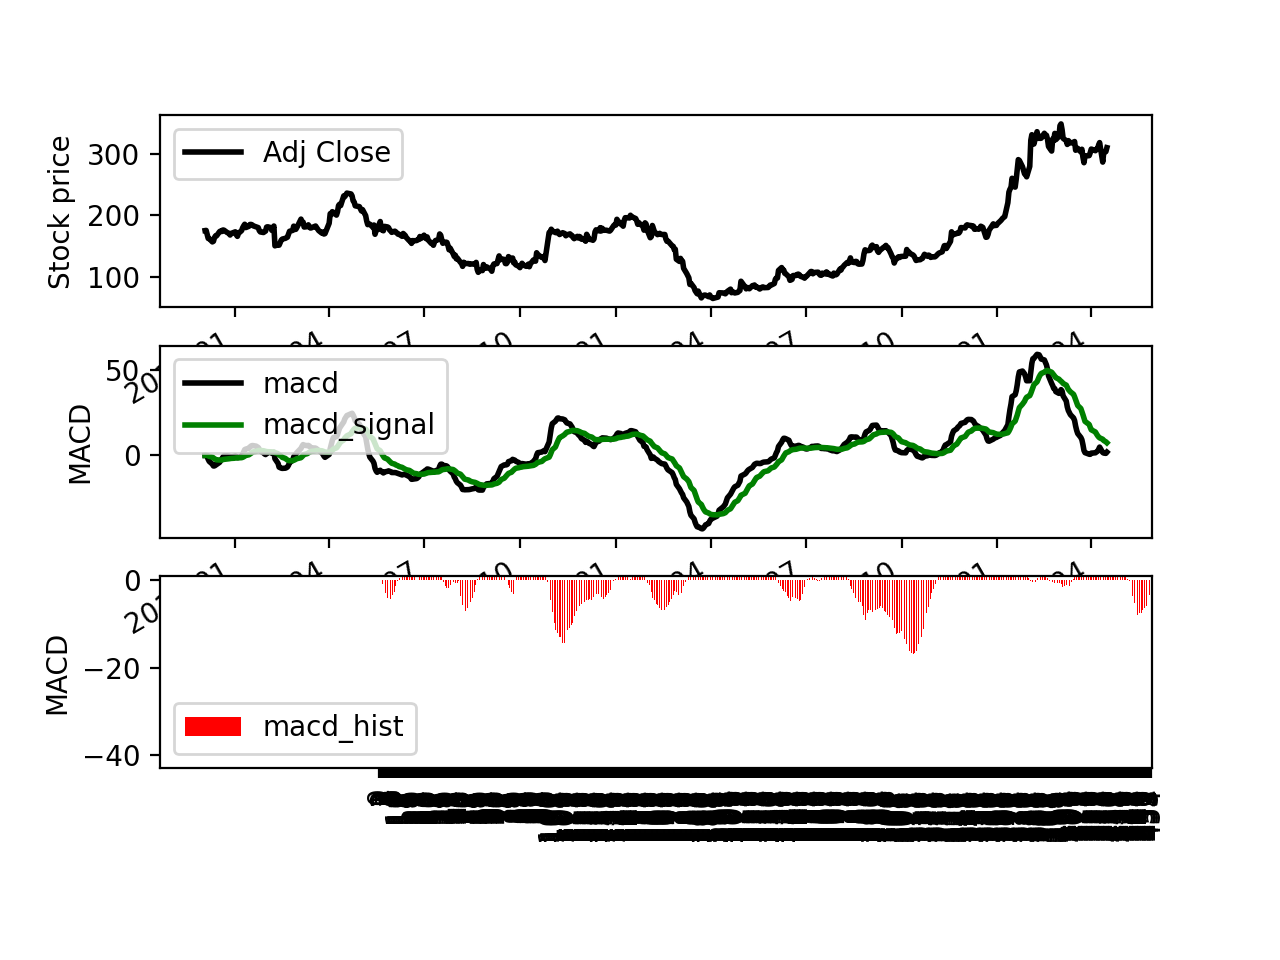

<AxesSubplot:ylabel='MACD'>

In [18]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(311,ylabel='Stock price')
stock_data['Adj Close'].plot(ax=ax1, color='black',lw=2, legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD')
stock_data['macd'].plot(ax=ax2, color='black', lw=2., legend=True)
stock_data['macd_signal'].plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
stock_data['macd_hist'].plot(ax=ax3, color='r', kind='bar', legend=True,use_index=False)